In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv('Country-data.csv')

In [3]:
datafinal=pd.read_csv('Country-data.csv')

In [18]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
data.shape

(167, 9)

# Checking null values for the fields:

In [13]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Vizualising the Outliers

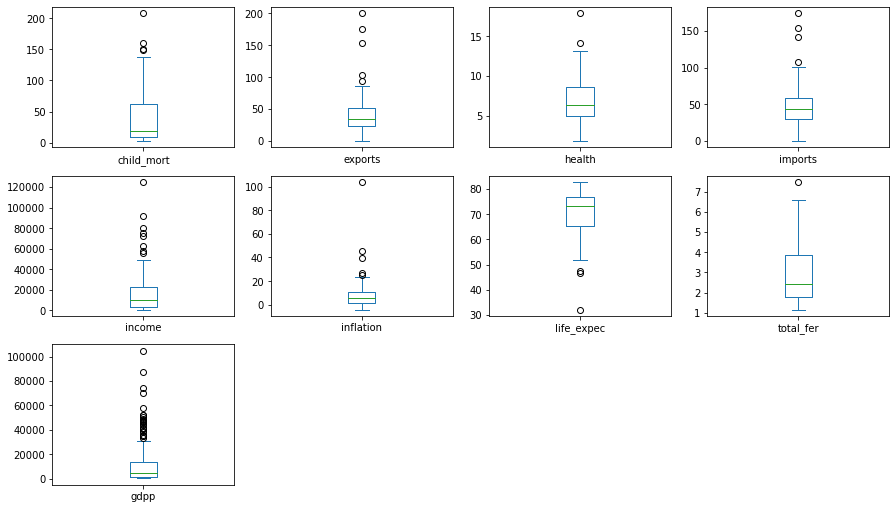

In [20]:
data.plot(kind='box', subplots=True, layout=(5,4), figsize=(15,15))
plt.show()

# Dealing with Outliers

In [37]:
# To get list of features
#lists1 = data.columns.to_list()

lists=data.select_dtypes(include=['float64','int64']).columns.to_list()

In [38]:
def IQR_CAP(data,cols):
    
    for col in cols:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        
        IQR=Q3-Q1
        
        LL=Q1-(1.5*IQR)
        UL=Q3+(1.5*IQR)
        
        data[col]= np.where(data[col]>UL,UL,np.where(data[col]<LL,LL,data[col]))

In [39]:
IQR_CAP(data,lists)

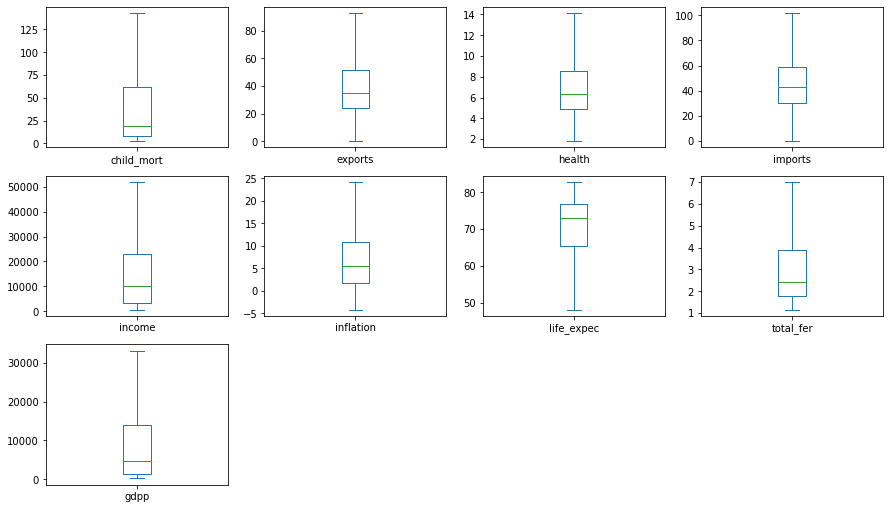

In [40]:
data.plot(kind='box', subplots=True, layout=(5,4), figsize=(15,15))
plt.show()

Find the countries in dire need of help using Clustering
K Means Clustering

In [41]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,39.543557,6.792575,45.862071,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,21.301318,2.668103,20.338815,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,92.675000,14.120000,101.575000,51967.500000,24.160000,82.800000,7.007500,33130.000000


In [61]:
#scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

data.drop('country',inplace=True,axis=1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)



In [46]:
data = pd.DataFrame(data)

In [47]:
data.describe()

,0,1,2,3,4,5,6,7,8
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.250210,0.426016,0.404758,0.451153,0.298151,0.397429,0.650756,0.306458,0.307617
std,0.274057,0.230120,0.216743,0.200364,0.296099,0.236340,0.245253,0.257032,0.352960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040278,0.255936,0.252640,0.296861,0.053467,0.212196,0.496403,0.110115,0.033405
50%,0.119052,0.376931,0.366369,0.425914,0.182073,0.338386,0.720863,0.215109,0.134624
75%,0.424167,0.553562,0.551584,0.578117,0.432080,0.527318,0.827338,0.466069,0.420043
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Finding the best value of k
from sklearn.cluster import KMeans

wcss=[]
k_range = range(1,12)

for k in k_range:
    cluster = KMeans(n_clusters=k)
    cluster.fit(data)
    wcss.append(cluster.inertia_)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

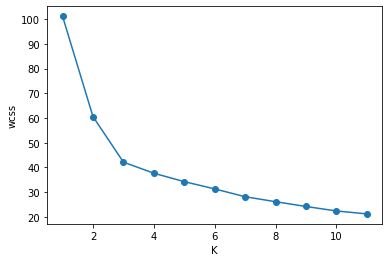

In [50]:
plt.plot(k_range,wcss,"-o")
plt.xlabel("K")
plt.ylabel("wcss")

In [51]:
kmeans = KMeans(n_clusters=4,random_state=34)
clusters = kmeans.fit_predict(data)

In [52]:
datafinal['clusters'] = clusters

In [53]:
datafinal

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [54]:
# Vizualising the clusters using features

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

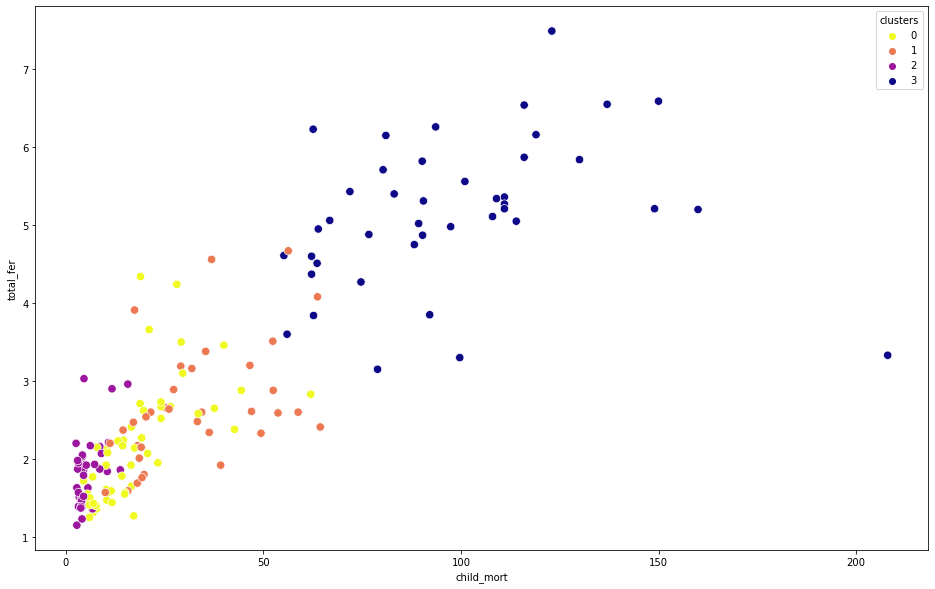

In [55]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=datafinal['child_mort'],y=datafinal['total_fer'],data=datafinal,hue = datafinal['clusters'],palette='plasma_r',s=70)

<AxesSubplot:xlabel='income', ylabel='gdpp'>

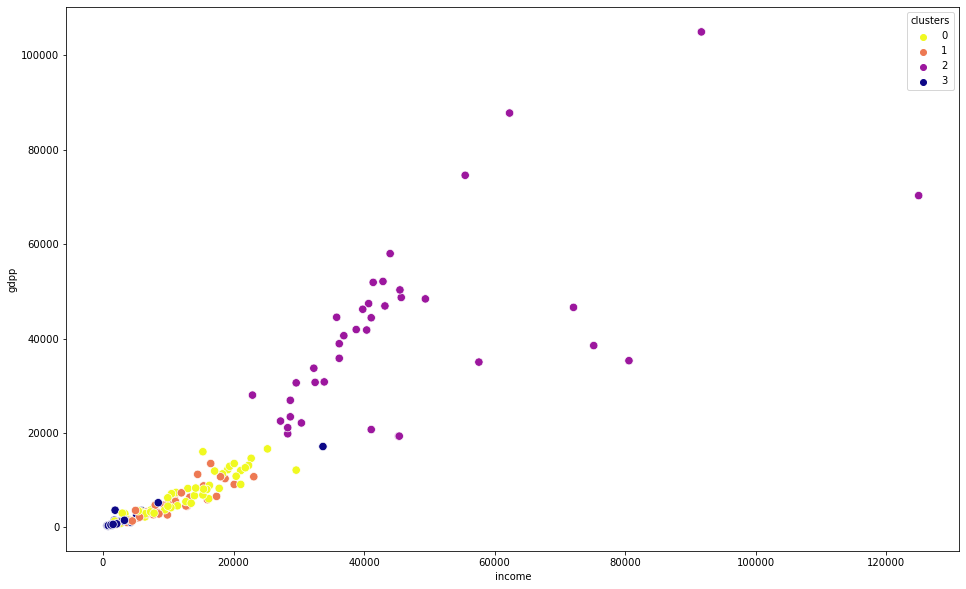

In [56]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=datafinal['income'],y=datafinal['gdpp'],data=datafinal,hue = datafinal['clusters'],palette='plasma_r',s=70)

In [57]:
datafinal.groupby('clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,17.890385,48.919231,6.867500,58.788462,12430.000000,4.256808,73.163462,2.169038,6754.923077
1,32.585714,27.485400,5.484000,30.193311,10194.000000,13.064857,70.611429,2.672286,4908.457143
2,5.636842,57.594737,8.506316,49.836842,45594.736842,3.370711,79.844737,1.826053,41573.684211
3,97.764286,27.876429,6.331667,43.407143,3033.642857,11.734643,58.876190,5.157143,1480.047619


In [ ]:
From the above data Cluster 3  needs the most help

In [64]:
data_ctryneedshelp = datafinal[datafinal.clusters==3]

In [65]:
data_ctryneedshelp['country'].nunique()

42

In [66]:
data_ctryneedshelp['country'].to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Zambia']